In [8]:
!pip install kagglehub

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lopalp/alphanum")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'alphanum' dataset.
Path to dataset files: /kaggle/input/alphanum


In [10]:
import os

folder_path = os.path.join(path,'train')

if os.path.exists(folder_path):
    for filename in os.listdir(folder_path):
        print(filename)
else:
    print(f"Folder not found at: {folder_path}")

47
81
121
35
50
87
120
61
36
109
45
60
64
41
89
39
98
42
52
75
38
94
55
105
49
112
62
114
53
101
70
34
79
85
88
65
67
106
78
66
56
72
113
99
108
104
74
124
123
111
115
90
69
117
77
102
86
95
43
91
71
58
59
107
97
119
999
76
84
83
82
57
103
125
96
46
44
126
40
80
68
63
37
51
122
33
100
110
54
48
116
118
73
93


## Mmeber 01

data loading and initial inspection


In [11]:
import os

train_data_path = folder_path
class_image_counts = {}
total_images = 0

if os.path.exists(train_data_path):
    for class_name in os.listdir(train_data_path):
        class_path = os.path.join(train_data_path, class_name)
        if os.path.isdir(class_path):
            image_count = 0
            for filename in os.listdir(class_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_count += 1
            class_image_counts[class_name] = image_count
            total_images += image_count

total_classes = len(class_image_counts)

print(f"Total number of classes: {total_classes}")
print(f"Total number of images loaded: {total_images}")

Total number of classes: 94
Total number of images loaded: 76109


Visualize the distribution of classes in the dataset and resize


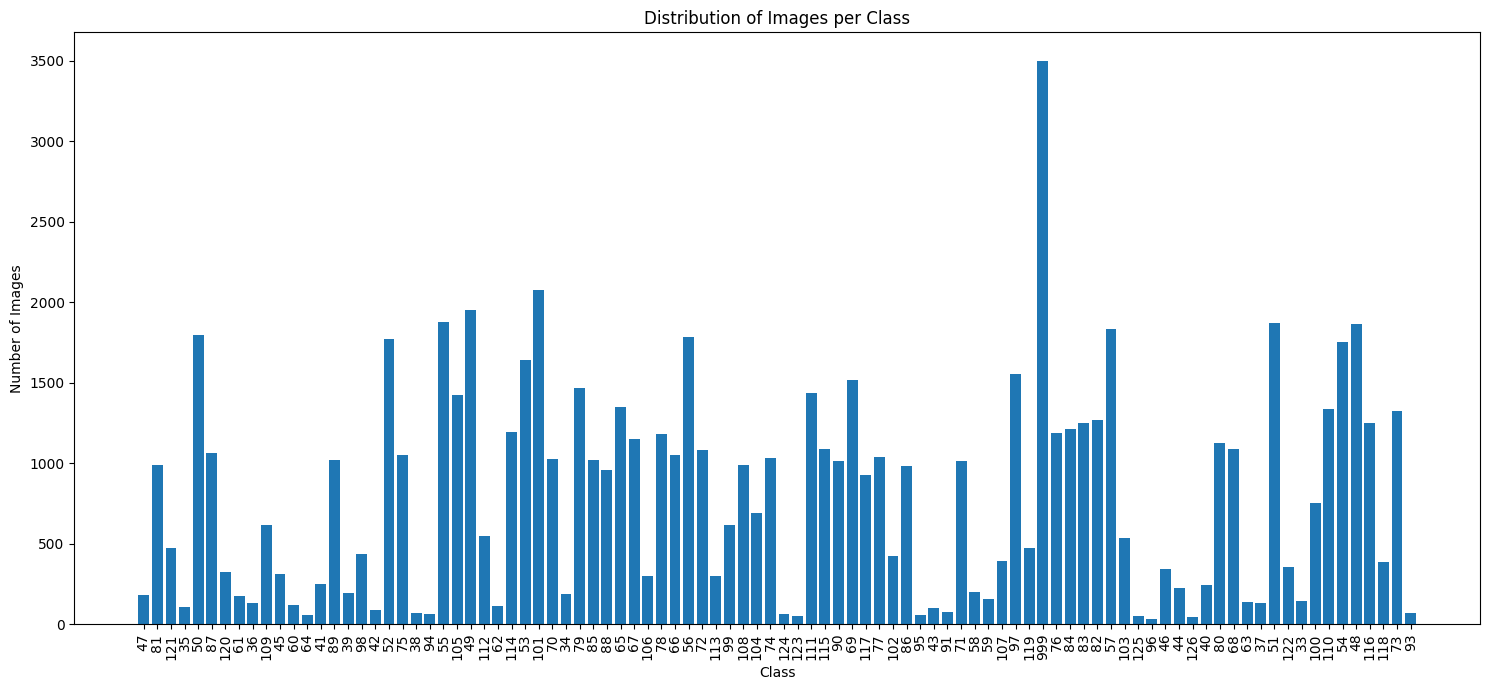

Class image counts saved to: results/outputs/counts/class_image_counts.json

Preprocessing (Resizing) images and displaying a sample:


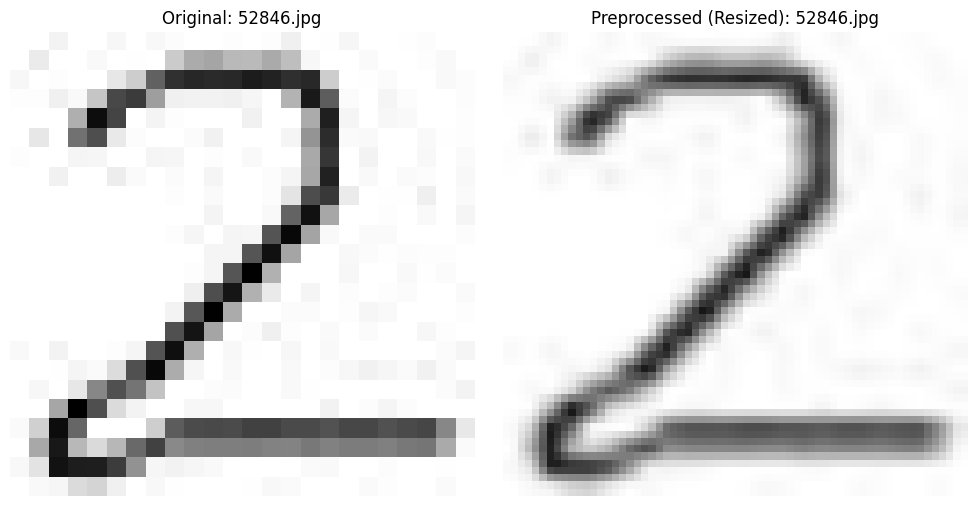


Saving preprocessed images to: results/outputs/resize
Finished saving 1880 preprocessed images to results/outputs/resize


In [12]:
import matplotlib.pyplot as plt
import cv2
import os
import json
import numpy as np
import random

def resize_image(image_array, target_size=(64, 64)):

    if image_array is None or image_array.size == 0:
        return None
    resized_img = cv2.resize(image_array, target_size)
    return resized_img


class_names = list(class_image_counts.keys())
image_counts = list(class_image_counts.values())

plt.figure(figsize=(15, 7))
plt.bar(class_names, image_counts)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# output  save location img count
output_dir_counts = 'results/outputs/counts'
os.makedirs(output_dir_counts, exist_ok=True)
output_file_path_counts = os.path.join(output_dir_counts, 'class_image_counts.json')
with open(output_file_path_counts, 'w') as f:
    json.dump(class_image_counts, f)
print(f"Class image counts saved to: {output_file_path_counts}")


# resizing  images show  samples

print(f"\nPreprocessing (Resizing) images and displaying a sample:")

subset_size_display = 1 # display img count
preprocessed_image_to_display = None
original_image_to_display = None
image_filename_to_display = None


#  list of all image paths
all_image_paths = []
for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        all_image_paths.extend([os.path.join(class_path, f) for f in image_files])

# sel random image to display
if len(all_image_paths) > 0:
    random_sample_path = random.choice(all_image_paths)

    original_img = cv2.imread(random_sample_path)

    if original_img is not None:
        resized_img = resize_image(original_img, target_size=(64, 64))

        if resized_img is not None:
            original_image_to_display = original_img
            preprocessed_image_to_display = resized_img
            image_filename_to_display = os.path.basename(random_sample_path)

    else:
        print(f"not load image{random_sample_path}")


# original and preprocessed image Comparing
if original_image_to_display is not None and preprocessed_image_to_display is not None:
    plt.figure(figsize=(10, 5))

    # original image
    plt.subplot(1, 2, 1)
    # Convert BGR to RGB for matplotlib display
    plt.imshow(cv2.cvtColor(original_image_to_display, cv2.COLOR_BGR2RGB))
    plt.title(f'Original: {image_filename_to_display}')
    plt.axis('off')

    #  preprocessed image
    plt.subplot(1, 2, 2)
    #  BGR to RGB for matplotlib display
    plt.imshow(cv2.cvtColor(preprocessed_image_to_display, cv2.COLOR_BGR2RGB))
    plt.title(f'Preprocessed (Resized): {image_filename_to_display}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images processed")


output_dir_preprocessed = 'results/outputs/resize'
os.makedirs(output_dir_preprocessed, exist_ok=True)

print(f"\nSaving preprocessed images to: {output_dir_preprocessed}")

# Process and save a subset of images for demonstration
# For processing the full dataset, consider running this in a separate script
processed_count_total = 0
subset_size_per_class = 20

for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        output_class_dir = os.path.join(output_dir_preprocessed, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        processed_count_class = 0
        for filename in image_files:
            if processed_count_class >= subset_size_per_class:
                break # Stop after processing subset_size_per_class images for this class

            image_path = os.path.join(class_path, filename)
            original_img = cv2.imread(image_path)

            if original_img is not None:
                # Apply preprocessing steps - only resizing the original image
                resized_img = resize_image(original_img, target_size=(64, 64)) # Use the resize function on original_img

                if resized_img is not None:
                    # Save the preprocessed image (resized color image)
                    output_image_path = os.path.join(output_class_dir, filename)
                    cv2.imwrite(output_image_path, resized_img)
                    processed_count_class += 1
                    processed_count_total += 1
            else:
                print(f"Warning: Could not load image {image_path}")


print(f"Finished saving {processed_count_total} preprocessed images to {output_dir_preprocessed}")

## Member 2

Grayscale conversion.

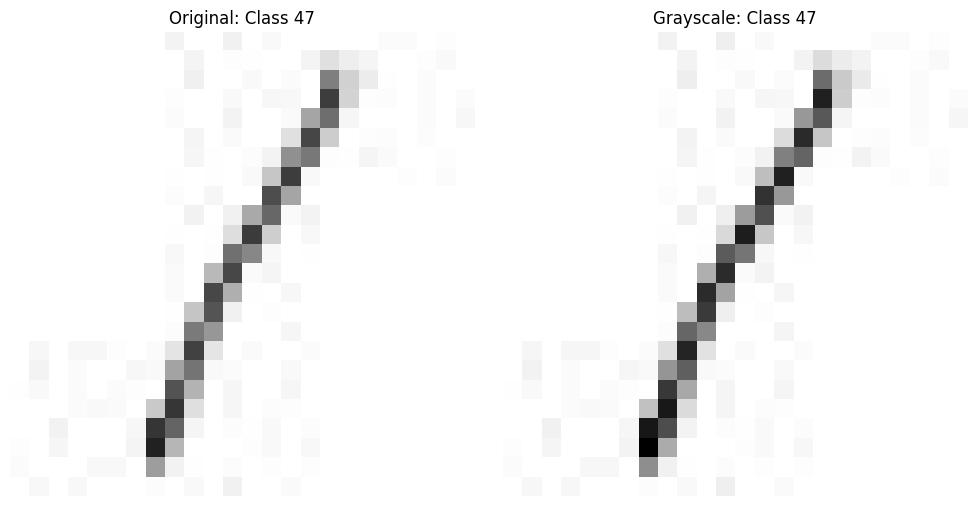

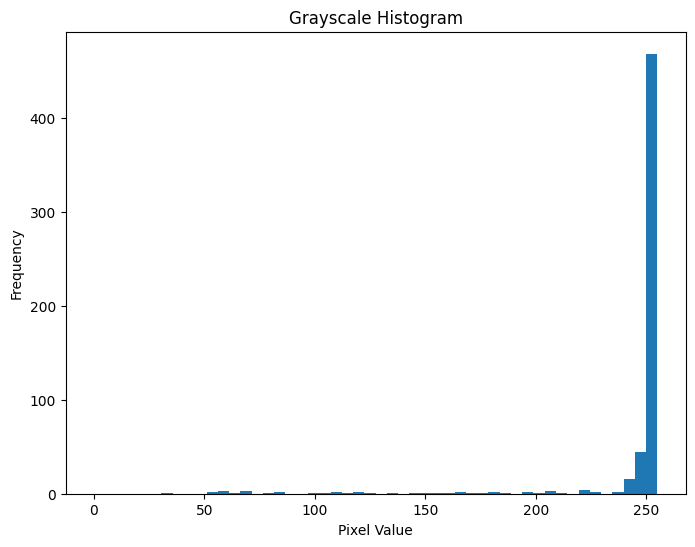


Saving preprocessed grayscale images to: results/outputs/grayscale
Finished saving a total of 16399 preprocessed images to results/outputs/grayscale


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def resize_image(image_array, target_size=(64, 64)):
    # Resizes an image array to a target size.
    if image_array is None or image_array.size == 0:
        return None
    resized_img = cv2.resize(image_array, target_size)
    return resized_img


def convert_to_grayscale(image_array):
  # images array to grayscale.

    if image_array is None or image_array.size == 0:
        return None
    # check image is grayscale
    if len(image_array.shape) == 2:
        return image_array
    # color image to grayscale
    gray_img = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)#BGR to GRAY
    return gray_img



sample_image_path = None
sample_class_name = None

# Find a Sample Image
for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path,class_name)
    if os.path.isdir(class_path):
        image_files = []
        for f in os.listdir(class_path):
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(f)

        if len(image_files) > 0:
            sample_image_path = os.path.join(class_path,image_files[0])
            sample_class_name = class_name
            break


# grayscale sample image
if sample_image_path and sample_class_name:
    original_img = cv2.imread(sample_image_path)

    if original_img is not None:
        grayscale_img = convert_to_grayscale(original_img)

        plt.figure(figsize=(10, 5))

        # original image
        plt.subplot(1, 2, 1)
        if len(original_img.shape) == 3:
            plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)) #BGR to RGB
        else:
             plt.imshow(original_img, cmap='gray') # Alread grayscale
        plt.title(f'Original: Class {sample_class_name}')
        plt.axis('off')

        # grayscale image
        plt.subplot(1, 2, 2)
        plt.imshow(grayscale_img, cmap='gray') # Display grayscale
        plt.title(f'Grayscale: Class {sample_class_name}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Could not load original image from {sample_image_path} ")
else:
    print("No image files found in the dataset ")

# Histogram
if grayscale_img is not None:
    plt.figure(figsize=(8, 6))
    plt.hist(grayscale_img.ravel(), bins=50, range=(0, 255)) # x axis 0-255
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title("Grayscale Histogram")
    plt.show()
else:
    print("No grayscale image found")


# saving Preprocessed Images
output_dir_preprocessed = 'results/outputs/grayscale'
os.makedirs(output_dir_preprocessed, exist_ok=True)

print(f"\nSaving preprocessed grayscale images to: {output_dir_preprocessed}")


subset_size = 0
subset_size_per_class = 200

for class_name in os.listdir(train_data_path):
    class_path = train_data_path+'/'+class_name
    if os.path.isdir(class_path):
        output_class_dir = output_dir_preprocessed+'/'+class_name
        os.makedirs(output_class_dir, exist_ok=True)

        image_files =[]
        for f in os.listdir(class_path):
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(f)

        processed_count = 0
        for filename in image_files:
            if processed_count >= subset_size_per_class:
                break

            image_path =os.path.join(class_path,filename)
            original_img = cv2.imread(image_path)

            if original_img is not None:
                grayscale_img = convert_to_grayscale(original_img)
                if grayscale_img is not None:
                    resized_img = resize_image(grayscale_img, target_size=(64, 64))

                    if resized_img is not None:
                        output_image_path = os.path.join(output_class_dir,filename) # output file path
                        cv2.imwrite(output_image_path, resized_img) # Save grayscale image
                        processed_count += 1
                        subset_size +=1
            else:
                print(f"Warning: Could not load image {image_path}")
print(f"Finished saving a total of {subset_size} preprocessed images to {output_dir_preprocessed}")

##member 3

Implement data normalization


Before normalization:
  Minimum pixel value: 61
  Maximum pixel value: 255
After normalization:
  Minimum pixel value: 0.239215686917305
  Maximum pixel value: 1.0

Saving preprocessed normalized images to: results/outputs/normalization
Finished saving 16399 preprocessed images to results/outputs/normalization


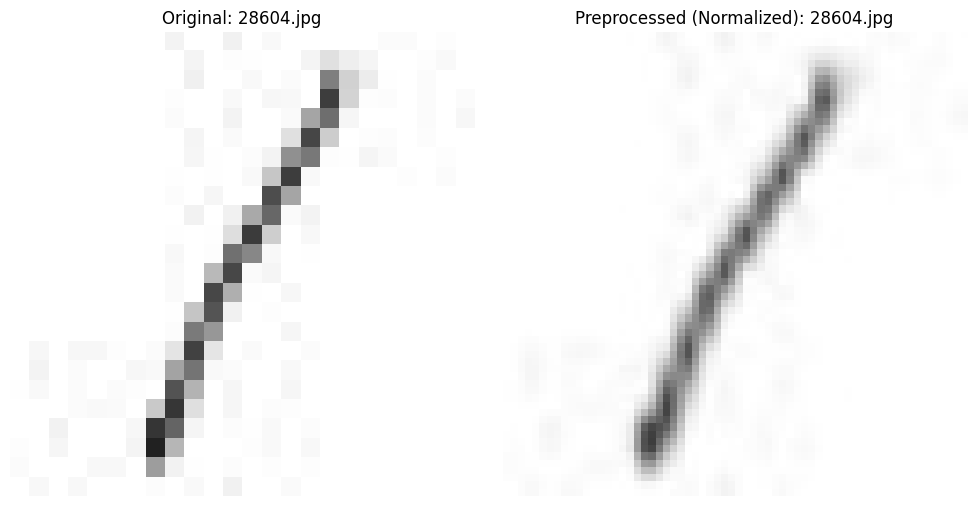

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os



# function  resize an image
def resize_image(image_array, target_size=(64, 64)):
#Resizes an image array to a target size.
    if image_array is None or image_array.size == 0:
        return None
    resized_img = cv2.resize(image_array, target_size)
    return resized_img

def convert_to_grayscale(image_array):
  # images array to grayscale.

    if image_array is None or image_array.size == 0:
        return None
    # check image is grayscale
    if len(image_array.shape) == 2:
        return image_array
    # color image to grayscale
    gray_img = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)#BGR to GRAY
    return gray_img


def normalize_image(image_array):
  #Normalizes image pixel value
    normalized_image = image_array.astype(np.float32) / 255.0
    return normalized_image

# disply normalization on a sample image  range
sample_image_path_norm_demo = None
for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if len(image_files) > 0:
            sample_image_path_norm_demo = os.path.join(class_path, image_files[0])
            break

preprocessed_img_norm_demo = None
if sample_image_path_norm_demo:
    original_img_norm_demo = cv2.imread(sample_image_path_norm_demo) # Read as color image
    if original_img_norm_demo is not None:
        resized_img_norm_demo = resize_image(original_img_norm_demo, target_size=(64, 64))
        if resized_img_norm_demo is not None:
            preprocessed_img_norm_demo = resized_img_norm_demo
        else:
             print(f"Could not resize sample image: {sample_image_path_norm_demo}")
    else:
        print(f"Could not load original image from {sample_image_path_norm_demo} for normalization demonstration.")
else:
    print("No image files found in the dataset for normalization demonstration.")


if preprocessed_img_norm_demo is not None:
    # Print min and max values before normalization
    print("Before normalization:")
    print(f"  Minimum pixel value: {np.min(preprocessed_img_norm_demo)}")
    print(f"  Maximum pixel value: {np.max(preprocessed_img_norm_demo)}")

    # Apply normalization
    normalized_img = normalize_image(preprocessed_img_norm_demo)

    # Print min and max values after normalization
    print("After normalization:")
    print(f"  Minimum pixel value: {np.min(normalized_img)}")
    print(f"  Maximum pixel value: {np.max(normalized_img)}")
else:
    print("Could not perform normalization as no preprocessed image is available for demonstration.")


#Save Preprocessed Images

# output file path
output_dir_preprocessed = 'results/outputs/normalization'
os.makedirs(output_dir_preprocessed, exist_ok=True)

print(f"\nSaving preprocessed normalized images to: {output_dir_preprocessed}")

subset_size_per_class = 200
processed_count_total = 0

# Initialize sample image paths for display
sample_saved_image_path = None
original_sample_image_path = None


for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        output_class_dir = os.path.join(output_dir_preprocessed, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        processed_count_class = 0
        for filename in image_files:
            if processed_count_class >= subset_size_per_class:
                break # Stop after processing subset_size_per_class images for this class

            image_path = os.path.join(class_path, filename)
            original_img = cv2.imread(image_path)

            if original_img is not None:
                # Apply preprocessing steps: grayscale, resize, and normalize
                grayscale_img = convert_to_grayscale(original_img)
                if grayscale_img is not None:
                    resized_img = resize_image(grayscale_img, target_size=(64, 64))
                    if resized_img is not None:
                        normalized_img_to_save = normalize_image(resized_img)

                        # OpenCV's imwrite saves in the range [0, 255] for 8-bit images.
                        # Since we normalized to [0, 1], we need to scale back to [0, 255]
                        # and convert to uint8 before saving.
                        normalized_img_scaled = (normalized_img_to_save * 255).astype(np.uint8)


                        # Save the preprocessed image (normalized and scaled back to 0-255 range for saving)
                        output_image_path = os.path.join(output_class_dir, filename)
                        cv2.imwrite(output_image_path, normalized_img_scaled)
                        processed_count_class += 1
                        processed_count_total += 1

                        # Store paths for sample display if they haven't been stored yet
                        if sample_saved_image_path is None:
                            sample_saved_image_path = output_image_path
                            original_sample_image_path = image_path

            else:
                print(f"Warning: Could not load image {image_path}")


print(f"Finished saving {processed_count_total} preprocessed images to {output_dir_preprocessed}")
# Display a sample preprocessed image and its original counterpart
if sample_saved_image_path is not None and original_sample_image_path is not None:
    sample_saved_img = cv2.imread(sample_saved_image_path) # Read the normalized image as color
    original_sample_img = cv2.imread(original_sample_image_path) # Read the original image as color

    if sample_saved_img is not None and original_sample_img is not None:
        plt.figure(figsize=(10, 5))

        # Display original image
        plt.subplot(1, 2, 1)
        # Convert BGR to RGB for matplotlib display
        plt.imshow(cv2.cvtColor(original_sample_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original: {os.path.basename(original_sample_image_path)}')
        plt.axis('off')


        # Display preprocessed (normalized) image
        plt.subplot(1, 2, 2)
        # Convert BGR to RGB for matplotlib display
        plt.imshow(cv2.cvtColor(sample_saved_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Preprocessed (Normalized): {os.path.basename(sample_saved_image_path)}')
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Could not load sample images for display. Saved: {sample_saved_image_path}, Original: {original_sample_image_path}")
else:
    print("No images were saved to display a sample.")

histogram showing pixel values after normalization scaling.


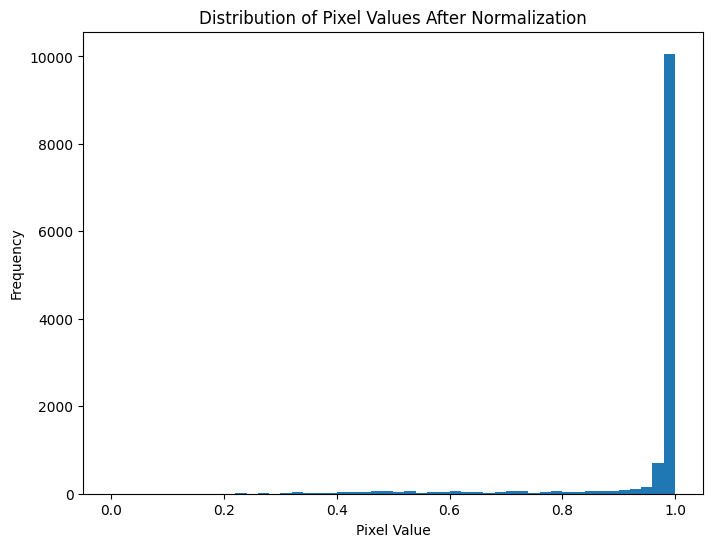

In [15]:
import matplotlib.pyplot as plt

if 'normalized_img' in locals() and normalized_img is not None:
    plt.figure(figsize=(8, 6))
    plt.hist(normalized_img.ravel(), bins=50, range=(0, 1))
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.title("Distribution of Pixel Values After Normalization")
    plt.show()
else:
    print("Normalized image not available")

## member 4

folder name labels into numerical labels.


In [16]:
import os
import numpy as np

folder_names = sorted(os.listdir(train_data_path))
class_mapping = {folder_name: i for i, folder_name in enumerate(folder_names)}

numerical_labels = []
image_paths = []

for folder_name in folder_names:
    folder_path = os.path.join(train_data_path, folder_name)
    if os.path.isdir(folder_path):
        numerical_label = class_mapping[folder_name]
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(folder_path, filename))
                numerical_labels.append(numerical_label)

numerical_labels_array = np.array(numerical_labels)
image_paths_array = np.array(image_paths) # Convert image_paths to a NumPy array


print("Sample of folder name to numerical label mapping:")
sample_mapping_keys = list(class_mapping.keys())[:10] # Display first 10 mappings
for key in sample_mapping_keys:
    print(f"{key}: {class_mapping[key]}")

print(f"\nTotal number of images processed: {len(numerical_labels_array)}")

# Save the numerical labels and paths
output_dir = 'results/outputs/labels'
os.makedirs(output_dir, exist_ok=True)

output_labels_path = os.path.join(output_dir, 'numerical_labels.npy')
output_image_paths = os.path.join(output_dir, 'image_paths.npy')

np.save(output_labels_path, numerical_labels_array)
np.save(output_image_paths, image_paths_array)

print(f"\nNumerical labels saved to: {output_labels_path}")
print(f"Image paths saved to: {output_image_paths}")

Sample of folder name to numerical label mapping:
100: 0
101: 1
102: 2
103: 3
104: 4
105: 5
106: 6
107: 7
108: 8
109: 9

Total number of images processed: 76109

Numerical labels saved to: results/outputs/labels/numerical_labels.npy
Image paths saved to: results/outputs/labels/image_paths.npy


 original folder names and encoded labels


In [17]:
import pandas as pd

class_mapping_df = pd.DataFrame(list(class_mapping.items()), columns=['Original Folder Name', 'Numerical Label'])
display(class_mapping_df)

,Original Folder Name,Numerical Label
0,100,0
1,101,1
2,102,2
3,103,3
4,104,4
...,...,...
89,96,89
90,97,90
91,98,91
92,99,92


## member 5

Brightness Augmentation

 Comparative Brightness Augmentation
display Brightness Augmentation on sample image: 28604.jpg


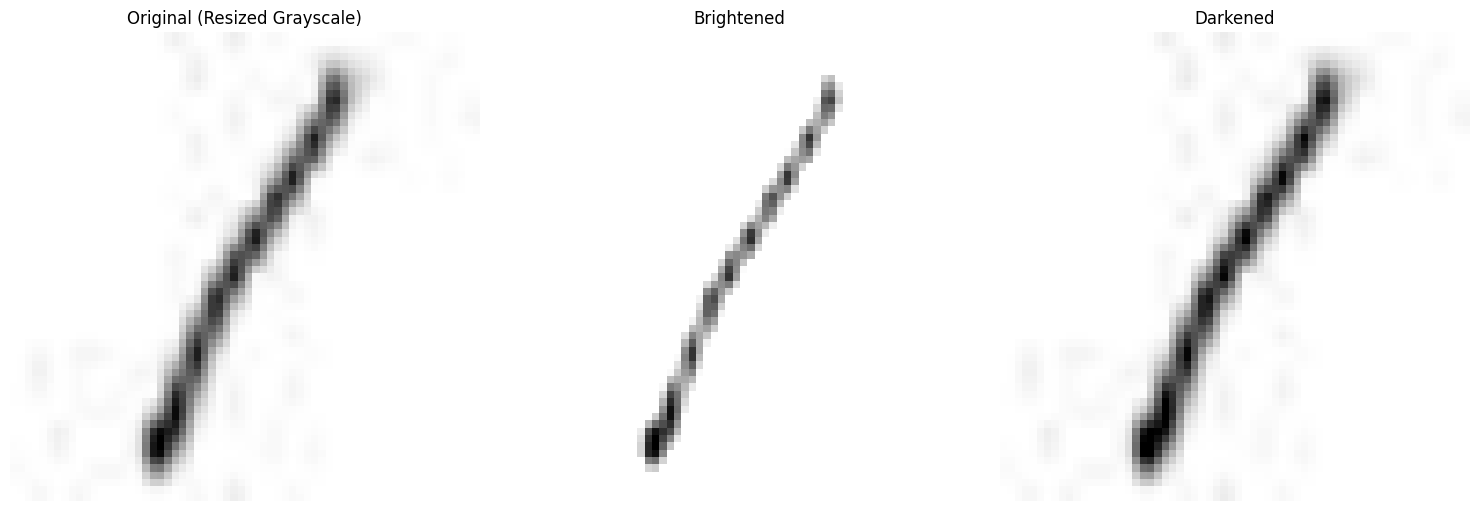


Saving preprocessed brightness augmented images to: results/outputs/Brightness
Finished saving 16399 preprocessed images to results/outputs/Brightness


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os



#Implement Brightness Augmentation
def augment_brightness(image_array, beta_range=(-50, 50)):
  #Adjusts the brightness of a grayscale image by adding a random beta value.

    if image_array is None or image_array.size == 0:
        return None

    beta = random.randint(beta_range[0], beta_range[1])
    augmented_img = cv2.add(image_array, beta) # Adds beta to each pixel
    augmented_img = np.clip(augmented_img, 0, 255).astype(np.uint8) # Clip values and ensure uint8
    return augmented_img


print(" Comparative Brightness Augmentation")

# Select a sample image for demonstration
sample_image_path = None
# Find the first image file in the dataset
for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if len(image_files) > 0:
            sample_image_path = os.path.join(class_path, image_files[0])
            break

if sample_image_path:
    original_img = cv2.imread(sample_image_path)

    if original_img is not None:
        # Preprocess the original image (grayscale and resize) for consistent input to augmentation
        grayscale_img = convert_to_grayscale(original_img)
        if grayscale_img is not None:
             resized_img = resize_image(grayscale_img, target_size=(64, 64))
             if resized_img is not None:

                print(f"display Brightness Augmentation on sample image: {os.path.basename(sample_image_path)}")

                # brightness augmentation with different beta values
                # fixed beta values for clear demonstration of brighter and darker
                brightened_img = augment_brightness(resized_img, beta_range=(80, 80)) # Example: add 80
                darkened_img = augment_brightness(resized_img, beta_range=(-80, -80)) # Example: subtract 80

                # Display original and augmented images
                plt.figure(figsize=(15, 5))

                plt.subplot(1, 3, 1)
                plt.imshow(resized_img, cmap='gray')
                plt.title('Original (Resized Grayscale)')
                plt.axis('off')

                plt.subplot(1, 3, 2)
                plt.imshow(brightened_img, cmap='gray')
                plt.title('Brightened')
                plt.axis('off')

                plt.subplot(1, 3, 3)
                plt.imshow(darkened_img, cmap='gray')
                plt.title('Darkened')
                plt.axis('off')

                plt.tight_layout()
                plt.show()

             else:
                print("Could not resize sample image for brightness augmentation demonstration.")
        else:
            print("Could not convert sample image to grayscale for brightness augmentation demonstration.")
    else:
        print(f"Could not load original image from {sample_image_path} for brightness augmentation demonstration.")
else:
    print("No image files found in the dataset for brightness augmentation demonstration.")


# Saving Preprocessed Brightness Augmented Images

# Define the output directory for preprocessed images and create it
output_dir_preprocessed = 'results/outputs/Brightness'
os.makedirs(output_dir_preprocessed, exist_ok=True)

print(f"\nSaving preprocessed brightness augmented images to: {output_dir_preprocessed}")

processed_count_total = 0
subset_size_per_class = 200

for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        output_class_dir = os.path.join(output_dir_preprocessed, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        processed_count_class = 0
        for filename in image_files:
            if processed_count_class >= subset_size_per_class:
                break # Stop after processing subset_size_per_class images for this class

            image_path = os.path.join(class_path, filename)
            original_img = cv2.imread(image_path)

            if original_img is not None:
                # Apply preprocessing steps - only resizing the original image
                resized_img = resize_image(original_img, target_size=(64, 64)) # Use the resize function on original_img

                if resized_img is not None:
                    # Save the preprocessed image (resized color image)
                    output_image_path = os.path.join(output_class_dir, filename)
                    cv2.imwrite(output_image_path, resized_img)
                    processed_count_class += 1
                    processed_count_total += 1
            else:
                print(f"Warning: Could not load image {image_path}")


print(f"Finished saving {processed_count_total} preprocessed images to {output_dir_preprocessed}")

## member 6

HoG (Histogram of Oriented Gradients)

Extracting HOG features from sample image: 28604.jpg


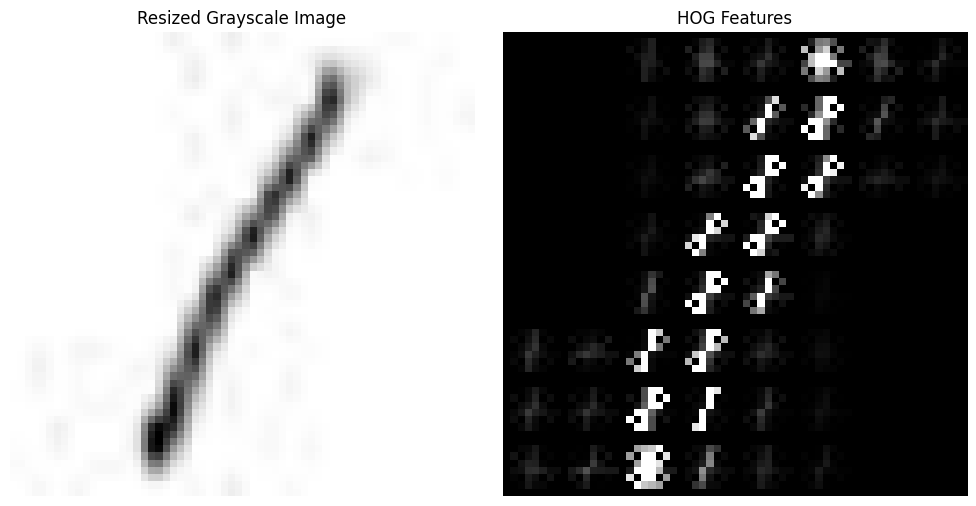


Shape of HOG features for sample image: (1764,)
Number of HOG features extracted: 1764

Extracting and saving HOG features to: results/outputs/HOG
Finished extracting and saving 16399 HOG features and labels.
HOG features saved to: results/outputs/HOG/hog_features.npy
Labels saved to: results/outputs/HOG/hog_labels.npy


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from skimage.feature import hog
from skimage import exposure


sample_image_path = None
# Find the first image file
for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if len(image_files) > 0:
            sample_image_path = os.path.join(class_path, image_files[0])
            break # Found one, no need to search further


if sample_image_path:
    original_img = cv2.imread(sample_image_path)

    if original_img is not None:
        # Convert to grayscale
        grayscale_img = convert_to_grayscale(original_img)
        if grayscale_img is not None:
            # Resize the grayscale image
            resized_img = resize_image(grayscale_img, target_size=(64, 64))
            if resized_img is not None:

                print(f"Extracting HOG features from sample image: {os.path.basename(sample_image_path)}")

                # Calculate HOG features
                fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                                    cells_per_block=(2, 2), visualize=True, channel_axis=None)

                # Rescale histogram
                hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

                # Display the original and HOG image
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(resized_img, cmap='gray')
                plt.title('Resized Grayscale Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(hog_image_rescaled, cmap='gray')
                plt.title('HOG Features')
                plt.axis('off')

                plt.tight_layout()
                plt.show()

                print(f"\nShape of HOG features for sample image: {fd.shape}")
                print(f"Number of HOG features extracted: {fd.size}")

            else:
                print("Could not resize sample image for HOG extraction.")
        else:
            print("Could not convert sample image to grayscale for HOG extraction.")
    else:
        print(f"Could not load original image from {sample_image_path} for HOG extraction.")
else:
    print("No image files found in the dataset for HOG extraction demonstration.")

#save Extracted HOG Features
#output directory
output_dir_hog_features = 'results/outputs/HOG'
os.makedirs(output_dir_hog_features, exist_ok=True)

print(f"\nExtracting and saving HOG features to: {output_dir_hog_features}")


subset_size_per_class = 200 # Process 200 images per class
processed_count_total = 0
all_hog_features = []
all_labels = []

# check  Lable_encoding is available
if 'class_mapping' not in locals():
    # recreate a  Lable_encoding if not available
    folder_names = sorted(os.listdir(train_data_path))
    class_mapping = {folder_name: i for i, folder_name in enumerate(folder_names)}


for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        numerical_label = class_mapping.get(class_name, -1) # Get label, -1 if not in mapping

        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        processed_count_class = 0
        for filename in image_files:
            if processed_count_class >= subset_size_per_class:
                break # Stop after processing subset_size_per_class images for this class


            image_path = os.path.join(class_path, filename)
            original_img = cv2.imread(image_path)

            if original_img is not None:
                grayscale_img = convert_to_grayscale(original_img)
                if grayscale_img is not None:
                    resized_img = resize_image(grayscale_img, target_size=(64, 64))
                    if resized_img is not None:
                        try:
                            # Extract HOG features
                            fd = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                                     cells_per_block=(2, 2), visualize=False, channel_axis=None)
                            all_hog_features.append(fd)
                            all_labels.append(numerical_label)
                            processed_count_class += 1
                            processed_count_total += 1
                        except Exception as e:
                            print(f"Could not extract HOG features from {image_path}: {e}")
            else:
                print(f"Warning: Could not load image {image_path}")


# list of features and labels to NumPy arrays
all_hog_features_array = np.array(all_hog_features)
all_labels_array = np.array(all_labels)

# Save the HOG
output_file_path_features = os.path.join(output_dir_hog_features, 'hog_features.npy')
output_file_path_labels = os.path.join(output_dir_hog_features, 'hog_labels.npy')

np.save(output_file_path_features, all_hog_features_array)
np.save(output_file_path_labels, all_labels_array)

print(f"Finished extracting and saving {processed_count_total} HOG features and labels.")
print(f"HOG features saved to: {output_file_path_features}")
print(f"Labels saved to: {output_file_path_labels}")